# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx") # Reading the dataset

In [3]:
df.head() 

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [5]:
df.shape

(900, 8)

In [6]:
df.duplicated().sum() #No duplicates

0

In [7]:
df.isnull().sum().any() #No missing values

False

In [8]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [9]:
df["Class"].value_counts()

Kecimen    450
Besni      450
Name: Class, dtype: int64

[Text(0, 0, '450'), Text(0, 0, '450')]

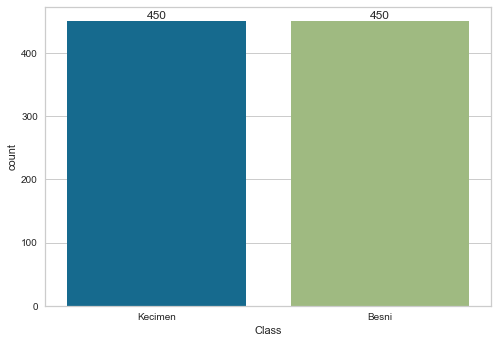

In [10]:
ax= sns.countplot(df["Class"]);
ax.bar_label(ax.containers[0]) # to show the proportion of each class

We have prety same amout of classes in the data set. So I can use accuracy as a metric to evaluate the performance of the classifier.

In [11]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) # mapping the classes to 0 and 1

In [12]:
df.iloc[:,:-1].iplot(kind="box")

In [ ]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [ ]:
df.iplot(kind="bar")                                          # 0: Keçimen , 1: Besni
# Eccentricity, Extent (not a distinguishing feature)

In [ ]:
fig = px.bar(df,x=df.index,y="Area",color="Class",color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(),vmin=-1,vmax=1, annot=True, cmap='coolwarm')

In [ ]:
corr_matrix = df.corr()
fig = px.imshow(corr_matrix)
fig.show()

In [ ]:
sns.pairplot(df, hue = "Class")

In [ ]:
fig = px.scatter_3d(df, x='Perimeter', y='Area', z='Extent',
              color='Class')
fig.show()

## Train | Test Split and Scaling

In [ ]:
df.info()

In [ ]:
X=df.drop(["Class"], axis=1)
y=df["Class"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=10)

In [ ]:
scaler =StandardScaler() # will be used in the pipelines

# Logistic Regression

In [ ]:
log_model = LogisticRegression() # will be used in the pipelines

In [ ]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) # pipeline for logistic regression

In [ ]:
log_pipe.fit(X_train, y_train)

In [ ]:
y_pred=log_pipe.predict(X_test)

In [ ]:
y_pred_proba = log_pipe.predict_proba(X_test)

## Model Performance

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) # to get the metrics for the model

### Cross Validate

In [ ]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]     

In [ ]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) # to get the metrics for the model

### GridSearchCV

In [ ]:
log_pipe.get_params()

In [ ]:
from sklearn.model_selection import GridSearchCV
# pipeline for logistic regression
model = Pipeline([("scaler",scaler),("log_model",log_model)]) 
# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"] 
# to get 20 values of C between -1 and 5
C = np.logspace(-1, 5, 20) 
# balanced: class weights are balanced, None: no class weights
class_weight= ["balanced", None] 
# to get 4 values of solver
solver = ["lbfgs", "liblinear", "sag", "saga"] 
# to get all the combinations of penalty, C, class_weight and solver
param_grid = {"log_model__penalty" : penalty,
              "log_model__C" : [C,1],
              "log_model__class_weight":class_weight,
              "log_model__solver":solver} 

# to get the best model
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1) 

In [ ]:
grid_model.fit(X_train,y_train)

In [ ]:
grid_model.best_params_ # to get the best parameters according to the best score

In [ ]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  

# test set accuracy raised 0.87 to 0.88,  21 wrong prediction

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [ ]:
plot_roc_curve(grid_model, X_test, y_test) # we use ROC curve to get the AUC score and evaluate the model if it is good or not on every threshold

In [ ]:
plot_roc_curve(log_pipe, X_test, y_test) 

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()  # to get a object of KNeighborsClassifier for pipeline

In [ ]:
knn_pipe = Pipeline([("scaler",scaler),("knn",knn)]) # pipeline for KNeighborsClassifier

In [ ]:
knn_pipe.fit(X_train, y_train)

In [ ]:
knn_pred = knn_pipe.predict(X_test)

In [ ]:
eval_metric(knn_pipe, X_train, y_train, X_test, y_test)

### Elbow Method for Choosing Reasonable K Values

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [ ]:
test_error_rates = []
for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10)
    
    accuracy_mean = scores["test_accuracy"].mean() 
    
    test_error = 1 - accuracy_mean
    
    test_error_rates.append(test_error)


# {'knn__metric': 'minkowski','knn__n_neighbors': 14,'knn__p': 1,'knn__weights': 'uniform'}

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.plot(range(1,30), test_error_rates, color='black', linestyle='-', marker='X',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

In [ ]:
test_error_rates = []
train_error_rates = []


for k in range(1,30):
    
    operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=k))]

    knn_pipe_model = Pipeline(steps=operations)
    
    knn_pipe_model.fit(X_train,y_train) 
    
    scores = cross_validate(knn_pipe_model, X_train, y_train, scoring = ['accuracy'], cv = 10, return_train_score=True)
    
    accuracy_test_mean = scores["test_accuracy"].mean() 
    accuracy_train_mean = scores["train_accuracy"].mean() 

    
    test_error = 1 - accuracy_test_mean
    train_error = 1 - accuracy_train_mean
    test_error_rates.append(test_error)
    train_error_rates.append(train_error)

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)

plt.plot(range(1,30), train_error_rates, color='green', linestyle='--', marker='o',
         markerfacecolor='blue', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

### Scores by Various K Values

In [ ]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=2))])
knn.fit(X_train,y_train)
print('WITH K=2\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

In [ ]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=8))])

knn.fit(X_train,y_train)
print('WITH K=8\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  

In [ ]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=25))])

knn.fit(X_train,y_train)
print('WITH 25K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

In [ ]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   
knn.fit(X_train,y_train)
print('WITH 5K=\n')
eval_metric(knn, X_train, y_train, X_test, y_test)

### Cross Validate

In [ ]:
model =Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

In [ ]:
df_scores.mean()[2:]        

In [ ]:
knn = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier(n_neighbors=5))])   # test_accuracy:    0.86 , train_accuracy :  0.88
                                              
                                                                                  # validation_test_accuracy     0.85  (cross validation)                                          
                                                                                  # (k=5 with elbow) with 26 wrong prediction
knn.fit(X_train,y_train)
print('WITH K=5\n')
eval_metric(knn, X_train, y_train, X_test, y_test)  


### Gridsearch Method for Choosing Reasonable K Values

In [ ]:
knn.get_params()

In [ ]:
# pipeline for KNeighborsClassifier
knn_grid = Pipeline([("scaler",scaler),("knn",KNeighborsClassifier())]) 
# to get all the values of k between 1 and 30
k_values= range(1,30) 
# to get the values of weight
weight = ['uniform', 'distance'] 
# to get the values of p
p = [1,2] 
# to get the values of metric
metric = ['minkowski'] 
# to get all the combinations of k, weight, p and metric
param_grid = {'knn__n_neighbors': k_values,
              'knn__weights': weight, 
              'knn__p': p, 
              'knn__metric': metric} 
# to get the best model according to the best score
knn_grid_model = GridSearchCV(estimator= knn_grid, 
                             param_grid=param_grid,
                             cv=10, 
                             scoring= 'accuracy',
                             n_jobs=-1, return_train_score=True) 

In [ ]:
knn_grid_model.fit(X_train, y_train)

In [ ]:
knn_grid_model.best_params_ # to get the best parameters according to the best score

In [ ]:
knn_grid_model.best_estimator_

In [ ]:
knn_grid_model.best_index_

In [ ]:
pd.DataFrame(knn_grid_model.cv_results_).loc[knn_grid_model.best_index_, ["mean_test_score", "mean_train_score"]]

In [ ]:
print('WITH K=14\n')      #  knn      test_accuracy :   0.85  (k=14 with gridsearch) with 27 wrong prediction

                          #  knn      test_accuracy :   0.86  (k=5 with elbow) with 26 wrong prediction
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

### Evaluating ROC Curves and AUC

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [ ]:
model = KNeighborsClassifier(n_neighbors=14, p=1, metric="minkowski", weights="uniform") # best gridsearch model
 
knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

In [ ]:
# 0.85  (k=14 with gridsearch) with 27 wrong prediction
plot_roc_curve(knn_model, X_test, y_test) 

In [ ]:
y_pred_proba = knn_model.predict_proba(X_test)
roc_auc_score(y_test, y_pred_proba[:,1])

In [ ]:
model = KNeighborsClassifier(n_neighbors=5) # best elbow model

knn_model = Pipeline([("scaler",scaler),("knn",model)])

knn_model.fit(X_train, y_train)

In [ ]:
#   knn_14 test_accuracy :  0.85   roc_auc=90     27 wrong prediction

#   knn_5 test_accuracy :   0.86   roc_auc=88     26 wrong prediction
plot_roc_curve(knn_model, X_test, y_test)  

# Conclusion 

* As a conclusion we aplied two models to predict raisins class and we got prety decent scores both of them
* We decided to use the Logistic Model because of its slightly better score than the knn models, plus the interpretability of logistic regression and its lower computational cost.